#               ALGORITHM AND GRAPHICS TO SUPPORT PAARL CDC SSEG REPORT

## PV ALGORITHMS

In [1]:
import csv
import math
import holidays
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('_mpl-gallery')

def read_year_points_from_file(csv_file):
    with open(csv_file, 'r') as csvfile:
        csv_reader = list(csv.reader(csvfile, delimiter=','))
        data_set=[]
        kilo = 1000
        paarl_cdc_gba = 3000
        year_month_day_hour=[0,0,0,0,0]
        kw_PV = 0
        kw_one = 0
        kw_two = 0
        kw_three = 0
        kw_four = 0
        normalisation_ratio = [1/(kilo*float(csv_reader[1][2])), paarl_cdc_gba/float(csv_reader[1][3]), paarl_cdc_gba/float(csv_reader[1][4]), paarl_cdc_gba/float(csv_reader[1][5]), paarl_cdc_gba/float(csv_reader[1][6])]
        sample = 0
        count = 0
        for row in csv_reader:
            count = count + 1
            if count > 2:
                sample = sample + 1
                try:
                    kw_PV = float(row[2]) * normalisation_ratio[0]
                except:  
                    kw_PV = math.nan
                try:
                    kw_one = float(row[3]) * normalisation_ratio[1]
                except:
                    kw_one = math.nan
                try:
                    kw_two = float(row[4]) * normalisation_ratio[2]
                except:
                    kw_two = math.nan
                try:
                    kw_three = float(row[5]) * normalisation_ratio[3]
                except:
                    kw_three = math.nan
                try:
                    kw_four = float(row[6]) * normalisation_ratio[4]
                except:
                    kw_four = math.nan
                year_month_day_hour = [
                    int(row[1].split(":")[0][0:4]),
                    int(row[1].split(":")[0][4:6]),
                    int(row[1].split(":")[0][6:8]),
                    int(row[1].split(":")[1][0:2]),
                    sample
                ]
                data_set.append([year_month_day_hour, kw_PV, kw_one, kw_two, kw_three, kw_four])
        data_set = clean_up_data(data_set)
        return(data_set)

def average_week(data):
    #find average of all weekdays and respective times to get an average week
    #Monday - Sunday, + public holiday
    spoilt = 0
    za_holidays = holidays.ZA()
    week_average = []
    day_of_week = [[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],
                   [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],
                   [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],
                   [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],
                   [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],
                   [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],
                   [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]],
                   [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
                  ]
    for column in range(1,len(data[0])):
        week_average.append(day_of_week.copy())
        for row in data:
            year_month_day = row[0]
            if date(year_month_day[0], year_month_day[1], year_month_day[2]) in za_holidays:
                week_day = 7
            else: 
                week_day = date(year_month_day[0], year_month_day[1], year_month_day[2]).weekday()
            time = year_month_day[3]
            if math.isnan(float(row[column])) == False:  
                if spoilt == 0:
                    week_average[column-1][week_day][time][0] = week_average[column-1][week_day][time][0] + row[column]
                    week_average[column-1][week_day][time][1] = week_average[column-1][week_day][time][1] + 1
                else:
                    spoilt = 0
            else:
                spoilt = 1
    return(week_average)

def clean_up_data(data):
    spoilt = 0
    week_average = average_week(data)
    za_holidays = holidays.ZA()
    for column in range(1,len(data[0])):
        for row in data:
            year_month_day = row[0]
            if date(year_month_day[0], year_month_day[1], year_month_day[2]) in za_holidays:
                week_day = 7
            else: 
                week_day = date(year_month_day[0], year_month_day[1], year_month_day[2]).weekday()
            time = year_month_day[3]
            if math.isnan(float(row[column])) == False:  
                if spoilt == 1:
                    row[column] = week_average[column-1][week_day][time][0] / week_average[column-1][week_day][time][1]
                    spoilt = 0
                else:
                    pass
            else:
                row[column] = week_average[column-1][week_day][time][0] / week_average[column-1][week_day][time][1]
                spoilt = 1
    return(data)

def energy_generated_or_consumed(data, PV_KWp, parameter):
    val_prev = data[0][0].copy()
    previous_pv = 0
    previous_kw_one = 0        
    previous_kw_two = 0        
    previous_kw_three = 0        
    previous_kw_four = 0 
    energy_PV_generated = 0
    energy_kw_one = 0
    energy_kw_two = 0
    energy_kw_three = 0
    energy_kw_four = 0
    sample = 0
    energy_demand_list=[]
    for row in data:
        sample = sample + 1
        year_month_day_hour = row[0].copy()
        if year_month_day_hour[parameter] != val_prev[parameter]:
            year_month_day_hour[parameter] = val_prev[parameter]
            val_prev = row[0].copy()
            if parameter < 1: year_month_day_hour[1] = "mm"
            if parameter < 2: year_month_day_hour[2] = "dd"
            if parameter < 3: year_month_day_hour[3] = "hh"
            year_month_day_hour[4] = sample 
            energy_demand_list.append([year_month_day_hour, 
                                    round(energy_PV_generated, global_decimal_places), 
                                    round(energy_kw_one, global_decimal_places), 
                                    round(energy_kw_two, global_decimal_places), 
                                    round(energy_kw_three, global_decimal_places), 
                                    round(energy_kw_four, global_decimal_places)]
                                  )
            energy_PV_generated = 0
            energy_kw_one = 0
            energy_kw_two = 0
            energy_kw_three = 0
            energy_kw_four = 0
            sample = 0        
        energy_PV_generated = energy_PV_generated + (float(row[1]) * PV_KWp + previous_pv)/2
        previous_pv = float(row[1]) * PV_KWp
        energy_kw_one = energy_kw_one + (float(row[2]) + previous_kw_one)/2
        previous_kw_one = float(row[2]) 
        energy_kw_two = energy_kw_two + (float(row[3]) + previous_kw_two)/2
        previous_kw_two = float(row[3])        
        energy_kw_three = energy_kw_three + (float(row[4]) + previous_kw_three)/2
        previous_kw_three = float(row[4])        
        energy_kw_four = energy_kw_four + (float(row[5]) + previous_kw_four)/2
        previous_kw_four = float(row[5])   
    else:
        if parameter < 1: year_month_day_hour[1] = "mm"
        if parameter < 2: year_month_day_hour[2] = "dd"
        if parameter < 3: year_month_day_hour[3] = "hh"
        year_month_day_hour[4] = sample 
        energy_demand_list.append([year_month_day_hour,
                                  round(energy_PV_generated, global_decimal_places), 
                                  round(energy_kw_one, global_decimal_places), 
                                  round(energy_kw_two, global_decimal_places), 
                                  round(energy_kw_three, global_decimal_places), 
                                  round(energy_kw_four, global_decimal_places)]
                                  )
    return(energy_demand_list) 

def find_peak_kW_generation_or_demand(data, PV_KWp, parameter):
    val_prev = data[0][0].copy()
    max_demand_kw_PV = 0
    max_demand_kw_one = 0
    max_demand_kw_two = 0
    max_demand_kw_three = 0
    max_demand_kw_four = 0
    max_demand_list = []
    sample = 0
    for row in data:
        year_month_day_hour = row[0].copy()
        if year_month_day_hour[parameter] != val_prev[parameter]:
            year_month_day_hour[parameter] = val_prev[parameter]
            val_prev = row[0].copy()
            if parameter < 1: year_month_day_hour[1] = "mm"
            if parameter < 2: year_month_day_hour[2] = "dd"
            if parameter < 3: year_month_day_hour[3] = "hh"
            year_month_day_hour[4] = sample 
            max_demand_list.append([year_month_day_hour, 
                                    round(max_demand_kw_PV, global_decimal_places), 
                                    round(max_demand_kw_one, global_decimal_places), 
                                    round(max_demand_kw_two, global_decimal_places), 
                                    round(max_demand_kw_three, global_decimal_places), 
                                    round(max_demand_kw_four, global_decimal_places)]
                                  )
            max_demand_kw_PV = 0
            max_demand_kw_one = 0
            max_demand_kw_two = 0
            max_demand_kw_three = 0
            max_demand_kw_four = 0
            sample = 0
        demand_kw_PV = row[1] * PV_KWp
        demand_kw_one = row[2]
        demand_kw_two = row[3]
        demand_kw_three = row[4]
        demand_kw_four = row[5]
        sample = sample + 1
        
        if demand_kw_PV > max_demand_kw_PV:
            max_demand_kw_PV = demand_kw_PV
        if demand_kw_one > max_demand_kw_one:
            max_demand_kw_one = demand_kw_one
        if demand_kw_two > max_demand_kw_two:
            max_demand_kw_two = demand_kw_two
        if demand_kw_three > max_demand_kw_three:
            max_demand_kw_three = demand_kw_three
        if demand_kw_four > max_demand_kw_four:
            max_demand_kw_four = demand_kw_four
    else:
        if parameter < 1: year_month_day_hour[1] = "mm"
        if parameter < 2: year_month_day_hour[2] = "dd"
        if parameter < 3: year_month_day_hour[3] = "hh"
        year_month_day_hour[4] = sample     
        max_demand_list.append([year_month_day_hour, 
                                round(max_demand_kw_PV, global_decimal_places), 
                                round(max_demand_kw_one, global_decimal_places), 
                                round(max_demand_kw_two, global_decimal_places), 
                                round(max_demand_kw_three, global_decimal_places), 
                                round(max_demand_kw_four, global_decimal_places)]
                              )
    return(max_demand_list) 
    
    
def calculate_load_factor(data, PV_KWp, parameter):
    load_factor_calculation = []
    maximum_demand_data = find_peak_kW_generation_or_demand(data, PV_KWp, parameter)
    energy_data = energy_generated_or_consumed(data, PV_KWp, parameter)
    for row in range(len(maximum_demand_data)):
        year_month_day = maximum_demand_data[row][0].copy()
        samples = year_month_day[4]
        for column in range(1,len(maximum_demand_data[row])):
            kW_demand = maximum_demand_data[row][column]
            energy_demand = energy_data[row][column]
            load_factor_percent = energy_demand / (kW_demand * samples) * 100
            year_month_day[4] = "-"
            load_factor_calculation.append([year_month_day, 
                                            kW_demand, 
                                            energy_demand, 
                                            round(load_factor_percent, global_decimal_places)])
    return(load_factor_calculation) 

def get_loadshedding_schedule(loadshed_schedule_file, region_id, stage):
    with open(loadshed_schedule_file, 'r') as csvfile:
        load_shed_status_list = []
        hour_load_shed_status_list = []
        csv_reader = list(csv.reader(csvfile, delimiter=','))
        for day in range(31):
            for hour in range(24):
                power_status = 1
                for row in csv_reader:
                    if int(row[0]) == hour and int(row[day+2]) == region_id and int(row[1]) <= stage:
                            power_status = 0
                hour_load_shed_status_list.append([hour, power_status])
            load_shed_status_list.append([day + 1, hour_load_shed_status_list.copy()])
            hour_load_shed_status_list = []
    return(load_shed_status_list)  

def balance_of_systems(data, column, PV_KWp, battery_kWh_high, battery_kWh_low, max_grid_charging_current, loadshed_region, loadshed_stage, mode):
    battery_soc = 0
    for convergence in range (5):
        grid_export = 0    
        grid_import = 0
        grid_charge = 0
        battery_soc = battery_soc
        previous_facility_kW = 0
        previous_pv_kW = 0
        energy_pv_total = 0
        energy_facility_total = 0
        loadshedding_schedule = get_loadshedding_schedule(loadshed_schedule_file, loadshed_region, loadshed_stage)
        statistics = []
    
        for row in data:
            day = row[0][2]
            time = row[0][3]
            load_shed_status = loadshedding_schedule[day-1][1][time][1]
        
            energy_facility = ((row[column] + previous_facility_kW) / 2) 
            previous_facility_kW = row[column]
        
            energy_pv = (row[1] + previous_pv_kW) * PV_KWp / 2
            previous_pv_kW = row[1]

            energy_pv_total = energy_pv_total + energy_pv
            energy_facility_total = energy_facility_total + energy_facility 
            
            if mode == 0:
                battery_charge = energy_pv - energy_facility
                battery_soc += battery_charge
            
                if battery_soc >= battery_kWh_low and battery_soc <= battery_kWh_high:
                    grid_charge = 0
        
                if battery_soc > battery_kWh_high:
                    grid_charge = battery_soc - battery_kWh_high 
                    battery_soc = battery_kWh_high 
        
                if battery_soc < battery_kWh_low:
                    grid_charge = battery_soc - battery_kWh_low
                    battery_soc = battery_kWh_low   
            
                if grid_charge < 0: #importing
                    grid_import += -grid_charge
        
                if grid_charge > 0: #exporting
                    grid_export += grid_charge
        
            if mode == 1:
                if load_shed_status == 0:
                    grid_charge = 0
                    
                    battery_charge = energy_pv - energy_facility
                    if battery_charge > 0:
                        battery_soc += battery_charge
                    else:
                        battery_soc += battery_charge
        
                    if battery_soc > battery_kWh_high: 
                        battery_soc = battery_kWh_high 
        
                    if battery_soc < battery_kWh_low:
                        energy_facility_total = energy_facility_total + (battery_soc - battery_kWh_low)
                        battery_soc = battery_kWh_low                           

                    if grid_charge < 0: #importing
                        grid_import += -0
        
                    if grid_charge > 0: #exporting
                        grid_export += 0    
 
                if load_shed_status == 1:
                    grid_charge = 0
                    
                    battery_charge = energy_pv - energy_facility
                    if battery_charge > 0:
                        battery_soc += battery_charge
                    else:
                        grid_charge += battery_charge
        
                    if battery_soc > battery_kWh_high:
                        grid_charge = battery_soc - battery_kWh_high 
                        battery_soc = battery_kWh_high 
                         
                    if grid_charge < 0: #importing
                        grid_import += -grid_charge
        
                    if grid_charge > 0: #exporting
                        grid_export += grid_charge     
                    
                if battery_soc < battery_kWh_high: 
                    charge_to_go = battery_kWh_high - battery_soc
                    unit_charge = ((max_grid_charging_current * 400 * 3 ** 0.5)/1000) * load_shed_status
                    if unit_charge < charge_to_go:
                        grid_import = grid_import + unit_charge * load_shed_status 
                        battery_soc = battery_soc + unit_charge  * load_shed_status
                    else:
                        grid_import = grid_import + charge_to_go  * load_shed_status 
                        battery_soc = battery_soc + charge_to_go  * load_shed_status
            statistics.append([row[0], battery_soc, grid_import, -grid_export, load_shed_status])               
                            
    return(round(grid_import, global_decimal_places), 
           round(grid_export, global_decimal_places), 
           round(battery_soc, global_decimal_places), 
           round(energy_pv_total, global_decimal_places), 
           round(energy_facility_total, global_decimal_places),
           statistics
          )
    
def write_to_csv(new_csv_file, max_demand_list):
    # open the file in the write mode
    with open(new_csv_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(max_demand_list)            
    return() 

global_decimal_places = 2
loadshed_schedule_file = 'C:\\Users\\Carlos de Gouveia\\My Drive\\Projects\\E4891 (Paarl CDC)\\PV Matters\\WesternCape_LS2.csv'
csv_file = 'C:\\Users\\Carlos de Gouveia\\My Drive\\Projects\\E4891 (Paarl CDC)\\PV Matters\\Timeseries_-33.695_18.995_SA2_155kWp_crystSi_14_32deg_135deg_2018_2020 2019 Reduced_PYTHON.csv'
data = read_year_points_from_file(csv_file)

new_csv_file = 'C:\\Users\\Carlos de Gouveia\\My Drive\\Projects\\E4891 (Paarl CDC)\\PV Matters\\max_demand.csv'
write_to_csv(new_csv_file,data)


()

## 3.2.3	Energy demand readings at similar facilities in the WCGH portfolio

Energy consumed in Y2019 facility (kWh) = 184066.11 HEIDEVELD_CDC


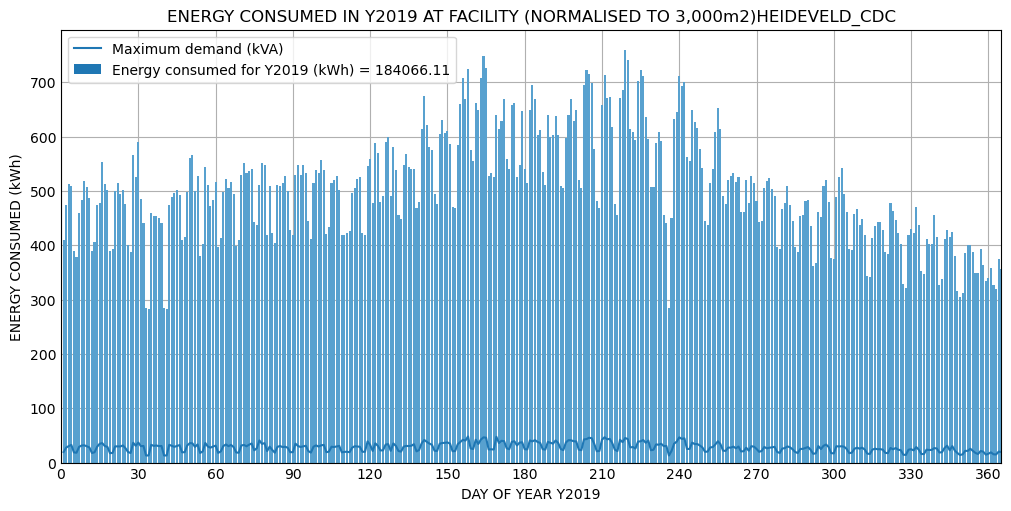

In [8]:
#                                          FACILITY ANNUAL ENERGY & kW DEMAND
#########################################################################################################################

#Initialise
day_of_year=[]
energy_consumed=[]
max_demand=[]
day_count = 0

HEIDEVELD_CDC = [2, "HEIDEVELD_CDC"]
HERMANUS_CDC = [3, "HERMANUS_CDC"]
KNYSNA_CDC = [4, "KNYSNA_CDC"]
MALMESBURY_CDC = [5, "MALMESBURY_CDC"]

# get data
facility = HEIDEVELD_CDC
total_energy_consumed = str(energy_generated_or_consumed(data, 115, annual)[0][facility[0]])
print("Energy consumed in Y2019 facility (kWh) = " + total_energy_consumed + " " +facility[1])
graph_data_energy = energy_generated_or_consumed(data, 115, daily)
graph_data_max_demand = find_peak_kW_generation_or_demand(data, 120, daily)

for day in graph_data_energy:
    day_count += 1
    energy_consumed.append(round(day[facility[0]],2))
    day_of_year.append(day_count)
    
for day in graph_data_max_demand:
    max_demand.append(round(day[facility[0]],2))

# plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
ax.bar(day_of_year, energy_consumed, label='Energy consumed for Y2019 (kWh) = ' + total_energy_consumed)
ax.bar(day_of_year, energy_consumed, linewidth=0.0)
ax.plot(day_of_year, max_demand, label='Maximum demand (kVA)')
ax.plot(day_of_year, max_demand, linewidth=0.0)
ax.set(xlim=(0, 365), xticks=np.arange(0, 365,30))
ax.set_xlabel('DAY OF YEAR Y2019')
ax.set_ylabel('ENERGY CONSUMED (kWh)')
ax.set_title("ENERGY CONSUMED IN Y2019 AT FACILITY (NORMALISED TO 3,000m2)" + facility[1])
ax.legend()
plt.show()

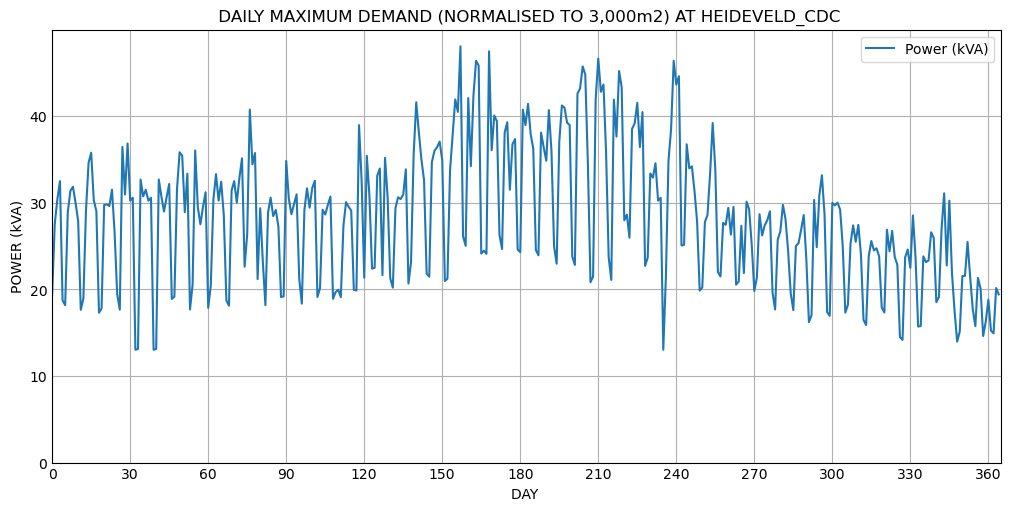

In [210]:
#                                          FACILITY DAILY MAXIMUM DEMAND
#########################################################################################################################

#Initialise
day_of_year=[]
energy_consumed=[]
max_demand=[]
day=[]
day_count = 0

HEIDEVELD_CDC = [2, "HEIDEVELD_CDC"]
HERMANUS_CDC = [3, "HERMANUS_CDC"]
KNYSNA_CDC = [4, "KNYSNA_CDC"]
MALMESBURY_CDC = [5, "MALMESBURY_CDC"]

# get data
facility = HEIDEVELD_CDC
graph_data_max_demand = find_peak_kW_generation_or_demand(data, 120, daily)

for hour in graph_data_max_demand:
    max_demand.append(round(hour[facility[0]],2))
    day.append(day_count)
    day_count += 1
        
# plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
ax.plot(day, max_demand, label='Power (kVA)')
ax.plot(day, max_demand, linewidth=0.0)
ax.set(xlim=(0, 365), xticks=np.arange(0, 365, 30))
ax.set(ylim=(0, 50), yticks=np.arange(0, 50, 10))
ax.set_xlabel('DAY ')  # Add an x-label to the axes.
ax.set_ylabel('POWER (kVA)')  # Add a y-label to the axes.
ax.set_title(" DAILY MAXIMUM DEMAND (NORMALISED TO 3,000m2) AT " + facility[1])
ax.legend()
plt.show()

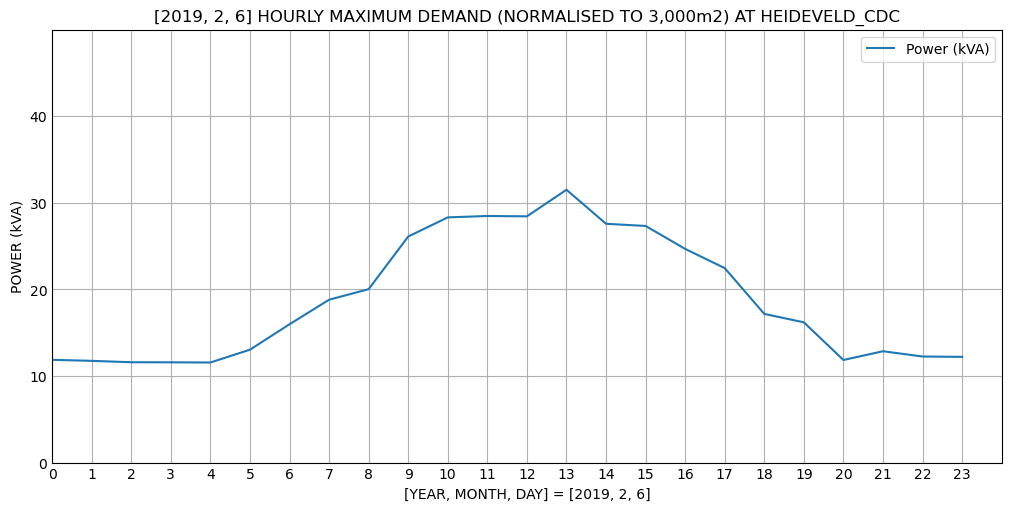

In [9]:
#                                          FACILITY TYPICAL DAY POWER DEMAND
#########################################################################################################################

#Initialise
day_of_year=[]
energy_consumed=[]
max_demand=[]
hour_of_day=[]
hour_count = 0

HEIDEVELD_CDC = [2, "HEIDEVELD_CDC"]
HERMANUS_CDC = [3, "HERMANUS_CDC"]
KNYSNA_CDC = [4, "KNYSNA_CDC"]
MALMESBURY_CDC = [5, "MALMESBURY_CDC"]

# get data
date = [2019, 2, 6]

facility = HEIDEVELD_CDC
graph_data_max_demand = find_peak_kW_generation_or_demand(data, 120, hourly)

for hour in graph_data_max_demand:
    if hour[0][0] == date[0] and hour[0][1] == date[1] and hour[0][2] == date[2]:
        max_demand.append(round(hour[facility[0]],2))
        hour_of_day.append(hour_count)
        hour_count += 1
        
# plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
ax.plot(hour_of_day, max_demand, label='Power (kVA)')
ax.plot(hour_of_day, max_demand, linewidth=0.0)
ax.set(xlim=(0, 24), xticks=np.arange(0, 24))
ax.set(ylim=(0, 50), yticks=np.arange(0, 50, 10))
ax.set_xlabel('[YEAR, MONTH, DAY] = ' + str(date))  # Add an x-label to the axes.
ax.set_ylabel('POWER (kVA)')  # Add a y-label to the axes.
ax.set_title(str(date) + " HOURLY MAXIMUM DEMAND (NORMALISED TO 3,000m2) AT " + facility[1])
ax.legend()
plt.show()

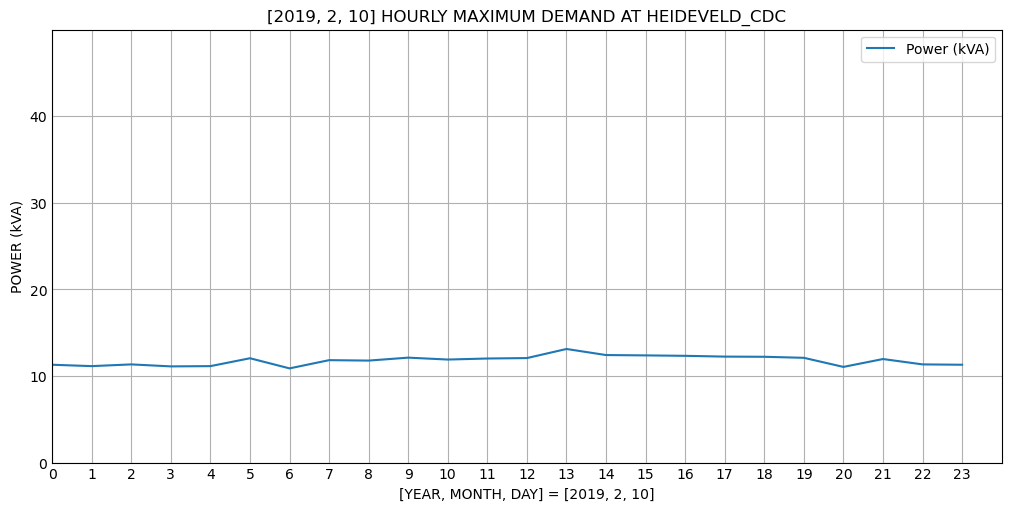

In [17]:
#                                          FACILITY TYPICAL DAY POWER DEMAND
#########################################################################################################################

#Initialise
day_of_year=[]
energy_consumed=[]
max_demand=[]
hour_of_day=[]
hour_count = 0

HEIDEVELD_CDC = [2, "HEIDEVELD_CDC"]
HERMANUS_CDC = [3, "HERMANUS_CDC"]
KNYSNA_CDC = [4, "KNYSNA_CDC"]
MALMESBURY_CDC = [5, "MALMESBURY_CDC"]

# get data
date = [2019, 2, 10]

facility = HEIDEVELD_CDC
graph_data_max_demand = find_peak_kW_generation_or_demand(data, 120, hourly)

for hour in graph_data_max_demand:
    if hour[0][0] == date[0] and hour[0][1] == date[1] and hour[0][2] == date[2]:
        max_demand.append(round(hour[facility[0]],2))
        hour_of_day.append(hour_count)
        hour_count += 1
        
# plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
ax.plot(hour_of_day, max_demand, label='Power (kVA)')
ax.plot(hour_of_day, max_demand, linewidth=0.0)
ax.set(xlim=(0, 24), xticks=np.arange(0, 24, 1))
ax.set(ylim=(0, 50), yticks=np.arange(0, 50, 10))
ax.set_xlabel('[YEAR, MONTH, DAY] = ' + str(date))
ax.set_ylabel('POWER (kVA)')
ax.set_title(str(date) + " HOURLY MAXIMUM DEMAND AT " + facility[1])
ax.legend()
plt.show()

## 4.4.2	SSEG PV Panel energy production capability

Energy_generated in Y2019 for 115kWp system (kWh) =  183847.62


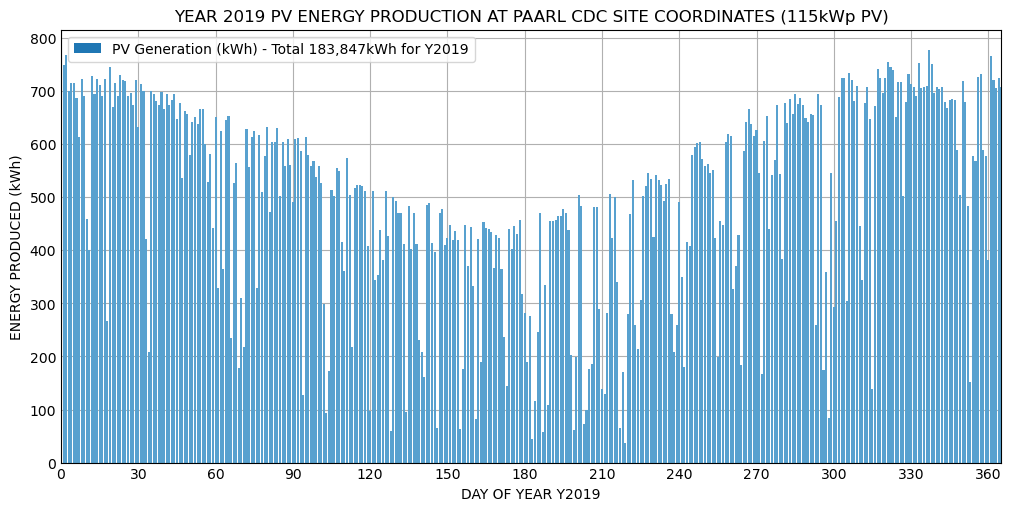

In [10]:
#                                               ANNUAL PV GENERATION
#########################################################################################################################

#Initialise
day_of_year=[]
energy_generate_PV=[]
day_count = 0
PV_READINGS = 1

# get data
print("Energy_generated in Y2019 for 115kWp system (kWh) = ", 
      energy_generated_or_consumed(data, 115, annual)[0][PV_READINGS])
graph_data = energy_generated_or_consumed(data, 115, daily)
for day in graph_data:
    day_count += 1
    energy_generate_PV.append(round(day[PV_READINGS],2))
    day_of_year.append(day_count)

# plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
ax.bar(day_of_year, energy_generate_PV, label='PV Generation (kWh) - Total 183,847kWh for Y2019')
ax.bar(day_of_year, energy_generate_PV, linewidth=0.0)
ax.set(xlim=(0, 365), xticks=np.arange(0, 365,30)),
ax.set_xlabel('DAY OF YEAR Y2019')
ax.set_ylabel('ENERGY PRODUCED (kWh)')
ax.set_title("YEAR 2019 PV ENERGY PRODUCTION AT PAARL CDC SITE COORDINATES (115kWp PV)")
ax.legend()
plt.show()

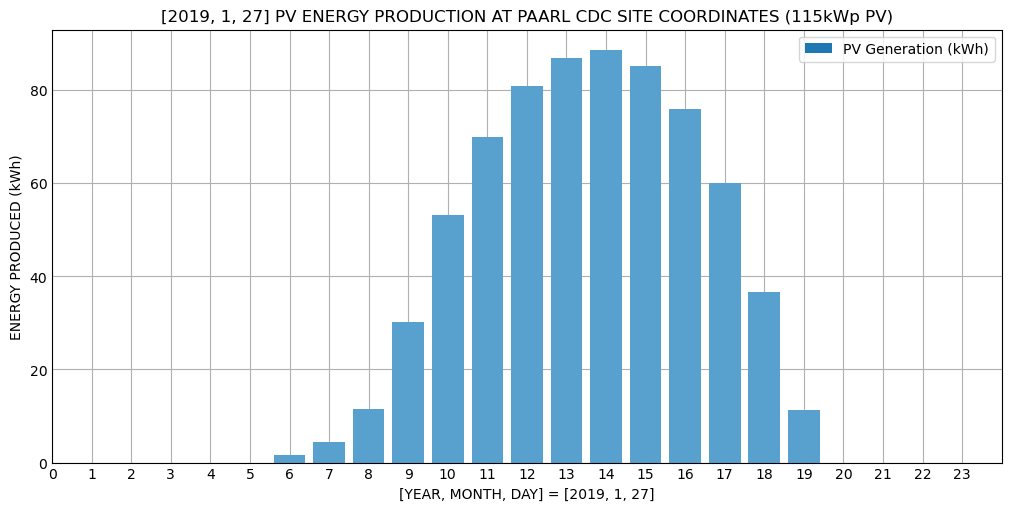

In [6]:
#                                               TYPICAL DAY PV GENERATION
#########################################################################################################################

#Initialise
hourly_PV=[]
hour_of_day = []
hour_count = 0
PV_READINGS = 1

# get data
date = [2019, 1, 27]

graph_data = energy_generated_or_consumed(data, 115, hourly)
for hour in graph_data:
    if hour[0][0] == date[0] and hour[0][1] == date[1] and hour[0][2] == date[2]:
        hourly_PV.append(round(hour[PV_READINGS],2))
        hour_of_day.append(hour_count)
        hour_count += 1

# plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
ax.bar(hour_of_day, hourly_PV, label='PV Generation (kWh)')
ax.bar(hour_of_day, hourly_PV, linewidth=0.0)
ax.set(xlim=(0, 24), xticks=np.arange(0, 24,1)),
ax.set_xlabel('[YEAR, MONTH, DAY] = ' + str(date))
ax.set_ylabel('ENERGY PRODUCED (kWh)')
ax.set_title(str(date) + " PV ENERGY PRODUCTION AT PAARL CDC SITE COORDINATES (115kWp PV)")
ax.legend()
plt.show()

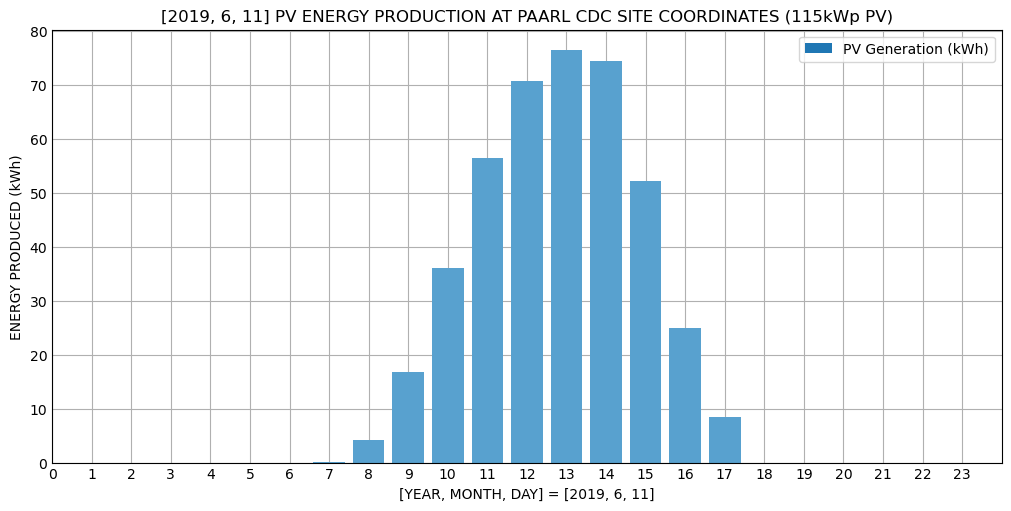

In [11]:
#                                               TYPICAL DAY PV GENERATION
#########################################################################################################################

#Initialise
hourly_PV=[]
hour_of_day = []
hour_count = 0
PV_READINGS = 1

# get data
date = [2019, 6, 11]

graph_data = energy_generated_or_consumed(data, 115, hourly)
for hour in graph_data:
    if hour[0][0] == date[0] and hour[0][1] == date[1] and hour[0][2] == date[2]:
        hourly_PV.append(round(hour[PV_READINGS],2))
        hour_of_day.append(hour_count)
        hour_count += 1

# plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
ax.bar(hour_of_day, hourly_PV, label='PV Generation (kWh)')
ax.bar(hour_of_day, hourly_PV, linewidth=0.0)
ax.set(xlim=(0, 24), xticks=np.arange(0, 24,1)),
ax.set_xlabel('[YEAR, MONTH, DAY] = ' + str(date))
ax.set_ylabel('ENERGY PRODUCED (kWh)')
ax.set_title(str(date) + " PV ENERGY PRODUCTION AT PAARL CDC SITE COORDINATES (115kWp PV)")
ax.legend()
plt.show()

# # 4.4.3	SSEG Battery options

In [179]:
#            (a)	PERMUTATION 1: Store excess PV generation for off-grid operation (or Net-Zero)
#########################################################################################################################

HEIDEVELD_CDC = [2, "HEIDEVELD_CDC"]
HERMANUS_CDC = [3, "HERMANUS_CDC"]
KNYSNA_CDC = [4, "KNYSNA_CDC"]
MALMESBURY_CDC = [5, "MALMESBURY_CDC"]

PV_KWp          = 120
battery_kWh_high_start= 4950 #(starting point)
battery_kWh_low = 0
max_grid_charging_current= 75 #Maximum allowed by Drakenstein. Applicable to mode 1 only
loadshed_region = 0 # Applicable to mode 1 only
loadshed_stage  = 0 # Applicable to mode 1 only
mode            = 0 #1 = Standby Hybrid mode, 0 = Grid tied mode
grid_import = 1
BOS = [0, 0, 0, 0, 0, []]

facilities = [HEIDEVELD_CDC, HERMANUS_CDC, KNYSNA_CDC, MALMESBURY_CDC]

for facility in facilities:
    battery_kWh_high = battery_kWh_high_start
    grid_import = 1
    grid_import_prev = 0
    while grid_import > 0 and BOS[3] >= BOS[4]:
        grid_import_prev = grid_import
        battery_kWh_high += 15
        BOS = balance_of_systems(data, facility[0], PV_KWp, battery_kWh_high, battery_kWh_low, max_grid_charging_current, loadshed_region, loadshed_stage, mode)
        grid_import = BOS[0]
    if BOS[3] < BOS[4]:
        print("Battery size won't converge. The system is Net-Consuming with " + str(PV_KWp)+"kWp PV system at ", facility[1])
    else:
        print("Battery size (kWh) required for Net-Zero or Off-grid with " + str(PV_KWp)+"kWp PV system = " + str(battery_kWh_high) + " at " + facility[1])

Battery size (kWh) required for Net-Zero or Off-grid with 120kWp PV system = 29505 at HEIDEVELD_CDC
Battery size (kWh) required for Net-Zero or Off-grid with 120kWp PV system = 11475 at HERMANUS_CDC
Battery size (kWh) required for Net-Zero or Off-grid with 120kWp PV system = 22020 at KNYSNA_CDC
Battery size won't converge. The system is Net-Consuming with 120kWp PV system at  MALMESBURY_CDC


## 4.5.3	HYBRID SSEG Battery options

In [205]:
#    (b)	PERMUTATION 3: Battery storage for Load shedding stages i) for full building (Essential + non-essential)
#########################################################################################################################

HEIDEVELD_CDC = [2, "HEIDEVELD_CDC"]
HERMANUS_CDC = [3, "HERMANUS_CDC"]
KNYSNA_CDC = [4, "KNYSNA_CDC"]
MALMESBURY_CDC = [5, "MALMESBURY_CDC"]

PV_KWp          = 0
battery_kWh_high_start= 0 #(starting point)
battery_kWh_low = 0
max_grid_charging_current= 75 #Maximum allowed by Drakenstein. Applicable to mode 1 only
loadshed_region = 9 # Applicable to mode 1 only
loadshed_stage  = 0 # Applicable to mode 1 only
mode            = 1 #1 = Standby Hybrid mode, 0 = Grid tied mode
grid_import = 1
BOS = [0, 0, 0, 0, 0, []]
load_shedding_stages = [1, 2, 3, 4, 5, 6, 7, 8]
facility_kwh = 0
normal_facility_kwh = 1

facilities = [HEIDEVELD_CDC, HERMANUS_CDC, KNYSNA_CDC, MALMESBURY_CDC]

for load_shedding_stage in load_shedding_stages:
    print("Load Shedding Stage = ", load_shedding_stage)
    for facility in facilities:
        battery_kWh_high = battery_kWh_high_start
        facility_kwh = 0
        facility_kwh_previous = 1
        normal_facility_kwh = balance_of_systems(data, facility[0], PV_KWp, battery_kWh_high, battery_kWh_low, max_grid_charging_current, 0, 0, mode)[4]
        while facility_kwh < normal_facility_kwh and facility_kwh != facility_kwh_previous:
            facility_kwh_previous = facility_kwh
            battery_kWh_high += 15
            BOS = balance_of_systems(data, facility[0], PV_KWp, battery_kWh_high, battery_kWh_low, max_grid_charging_current, loadshed_region, load_shedding_stage, mode)
            facility_kwh = BOS[4]
        if facility_kwh_previous != facility_kwh:
            print("Battery size (kWh) required for full standby = " + str(battery_kWh_high) + " at " + facility[1])
        else:
            print("Max charging current too small for this stage at " + facility[1])

Load Shedding Stage =  1
Battery size (kWh) required for full standby = 105 at HEIDEVELD_CDC
Battery size (kWh) required for full standby = 75 at HERMANUS_CDC
Battery size (kWh) required for full standby = 90 at KNYSNA_CDC
Battery size (kWh) required for full standby = 165 at MALMESBURY_CDC
Load Shedding Stage =  2
Battery size (kWh) required for full standby = 105 at HEIDEVELD_CDC
Battery size (kWh) required for full standby = 75 at HERMANUS_CDC
Battery size (kWh) required for full standby = 120 at KNYSNA_CDC
Battery size (kWh) required for full standby = 165 at MALMESBURY_CDC
Load Shedding Stage =  3
Battery size (kWh) required for full standby = 105 at HEIDEVELD_CDC
Battery size (kWh) required for full standby = 75 at HERMANUS_CDC
Battery size (kWh) required for full standby = 120 at KNYSNA_CDC
Battery size (kWh) required for full standby = 180 at MALMESBURY_CDC
Load Shedding Stage =  4
Battery size (kWh) required for full standby = 105 at HEIDEVELD_CDC
Battery size (kWh) required f

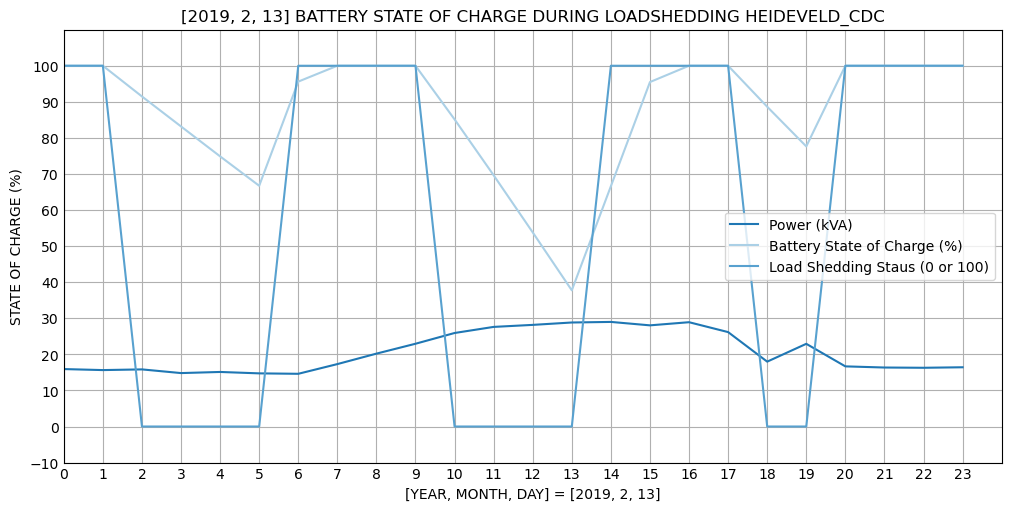

In [211]:
#                          BATTERY STATE OF CHARGE VISUALISATION FOR SELECTED DAY AND PARAMETERS 
#                                          100% FACILITY (ESSENTIAL + NON-ESSENTIAL)
#########################################################################################################################

#Initialise
day_of_year=[]
energy_consumed=[]
max_demand=[]
hour_of_day=[]
bos_data_battery_soc_perc = []
bos_data_loadshedding_status = []
hour_count = 0

HEIDEVELD_CDC = [2, "HEIDEVELD_CDC"]
HERMANUS_CDC = [3, "HERMANUS_CDC"]
KNYSNA_CDC = [4, "KNYSNA_CDC"]
MALMESBURY_CDC = [5, "MALMESBURY_CDC"]

# get data
date = [2019, 2, 13]

facility        = HEIDEVELD_CDC
PV_KWp          = 0
battery_kWh_high= 180
battery_kWh_low = 0
max_grid_charging_current= 75
loadshed_region = 9
loadshed_stage  = 6
mode            = 1 #1 = Standby Hybrid mode, 0 = Grid tied mode

graph_data_max_demand = find_peak_kW_generation_or_demand(data, 120, hourly)
balance_of_system_data = balance_of_systems(data, facility[0], PV_KWp, battery_kWh_high, battery_kWh_low, max_grid_charging_current, loadshed_region, loadshed_stage, mode)

for hour in graph_data_max_demand:
    if hour[0][0] == date[0] and hour[0][1] == date[1] and hour[0][2] == date[2]:
        max_demand.append(round(hour[facility[0]],2))
        hour_of_day.append(hour_count)
        hour_count += 1
        
for hour in balance_of_system_data[5]:
    if hour[0][0] == date[0] and hour[0][1] == date[1] and hour[0][2] == date[2]:
        bos_data_battery_soc_perc.append(hour[1]*100/battery_kWh_high)
        bos_data_loadshedding_status.append(hour[4]*100)
        
# plot
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
ax.plot(hour_of_day, max_demand, label='Power (kVA)')
ax.plot(hour_of_day, max_demand, linewidth=0.0)
ax.plot(hour_of_day, bos_data_battery_soc_perc, label='Battery State of Charge (%)')
ax.plot(hour_of_day, bos_data_battery_soc_perc, linewidth=0.0)
ax.plot(hour_of_day, bos_data_loadshedding_status, label='Load Shedding Staus (0 or 100)')
ax.plot(hour_of_day, bos_data_loadshedding_status, linewidth=0.0)
ax.set(xlim=(0, 24), xticks=np.arange(0, 24))
ax.set(ylim=(0, 110), yticks=np.arange(-10, 110, 10))
ax.set_xlabel('[YEAR, MONTH, DAY] = ' + str(date))  # Add an x-label to the axes.
ax.set_ylabel('STATE OF CHARGE (%)')  # Add a y-label to the axes.
ax.set_title(str(date) + " BATTERY STATE OF CHARGE DURING LOADSHEDDING " + facility[1])
ax.legend()
plt.show()

## 4.5.4	SSEG Battery and Generator options

In [212]:
#    Battery storage for Load shedding stages with PV contribution
#########################################################################################################################

HEIDEVELD_CDC = [2, "HEIDEVELD_CDC"]
HERMANUS_CDC = [3, "HERMANUS_CDC"]
KNYSNA_CDC = [4, "KNYSNA_CDC"]
MALMESBURY_CDC = [5, "MALMESBURY_CDC"]

PV_KWp          = 120
battery_kWh_high_start= 0 #(starting point)
battery_kWh_low = 0
max_grid_charging_current= 75 #Maximum allowed by Drakenstein. Applicable to mode 1 only
loadshed_region = 9 # Applicable to mode 1 only
loadshed_stage  = 0 # Applicable to mode 1 only
mode            = 1 #1 = Standby Hybrid mode, 0 = Grid tied mode
grid_import = 1
BOS = [0, 0, 0, 0, 0, []]
load_shedding_stages = [1, 2, 3, 4, 5, 6, 7, 8]
facility_kwh = 0
normal_facility_kwh = 1

facilities = [HEIDEVELD_CDC, HERMANUS_CDC, KNYSNA_CDC, MALMESBURY_CDC]

for load_shedding_stage in load_shedding_stages:
    print("Load Shedding Stage = ", load_shedding_stage)
    for facility in facilities:
        battery_kWh_high = battery_kWh_high_start
        facility_kwh = 0
        facility_kwh_previous = 1
        normal_facility_kwh = balance_of_systems(data, facility[0], PV_KWp, battery_kWh_high, battery_kWh_low, max_grid_charging_current, 0, 0, mode)[4]
        while facility_kwh < normal_facility_kwh and facility_kwh != facility_kwh_previous:
            facility_kwh_previous = facility_kwh
            battery_kWh_high += 15
            BOS = balance_of_systems(data, facility[0], PV_KWp, battery_kWh_high, battery_kWh_low, max_grid_charging_current, loadshed_region, load_shedding_stage, mode)
            facility_kwh = BOS[4]
        if facility_kwh_previous != facility_kwh:
            print("Battery size (kWh) required for full standby = " + str(battery_kWh_high) + " at " + facility[1])
        else:
            print("Max charging current too small for this stage at " + facility[1])

Load Shedding Stage =  1
Battery size (kWh) required for full standby = 90 at HEIDEVELD_CDC
Battery size (kWh) required for full standby = 60 at HERMANUS_CDC
Battery size (kWh) required for full standby = 75 at KNYSNA_CDC
Battery size (kWh) required for full standby = 105 at MALMESBURY_CDC
Load Shedding Stage =  2
Battery size (kWh) required for full standby = 90 at HEIDEVELD_CDC
Battery size (kWh) required for full standby = 60 at HERMANUS_CDC
Battery size (kWh) required for full standby = 75 at KNYSNA_CDC
Battery size (kWh) required for full standby = 120 at MALMESBURY_CDC
Load Shedding Stage =  3
Battery size (kWh) required for full standby = 90 at HEIDEVELD_CDC
Battery size (kWh) required for full standby = 60 at HERMANUS_CDC
Battery size (kWh) required for full standby = 90 at KNYSNA_CDC
Battery size (kWh) required for full standby = 120 at MALMESBURY_CDC
Load Shedding Stage =  4
Battery size (kWh) required for full standby = 90 at HEIDEVELD_CDC
Battery size (kWh) required for ful